In [2]:
import numpy as np
import cv2 as cv
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import fftpack
import PIL
from PIL import Image,ImageEnhance
from skimage.data import page
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola, threshold_triangle)
from skimage import img_as_ubyte

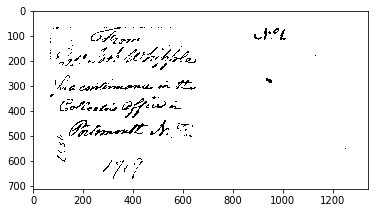

In [52]:
image = cv.imread('h05.bmp',0)
window_size =25
thresh_otsu=threshold_otsu(image)
binary_otsu = image > thresh_otsu
binary_otsu =img_as_ubyte(binary_otsu)

thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
binary_niblack = image > thresh_niblack
binary_niblack = img_as_ubyte(binary_niblack)

thresh_sauvola = threshold_sauvola(image, window_size=window_size)
binary_sauvola = image > thresh_sauvola
binary_sauvola =img_as_ubyte(binary_sauvola)

thresh_triangle=threshold_triangle(image)
binary_triangle = image > thresh_triangle
binary_triangle =img_as_ubyte(binary_triangle)

dst = cv.fastNlMeansDenoising(binary_niblack,30,50,10) 
plt.imshow(binary_sauvola, cmap='gray')

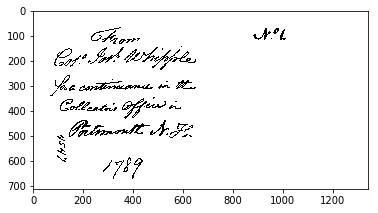

In [53]:
out_image = binary_sauvola
image = cv.imread('h05.bmp',0)
gt_image = cv.imread('h05.tiff',0)
plt.imshow(gt_image, cmap='gray')

In [54]:
fm = []
image = rgb2gray(image)
image = np.uint8(np.floor(image))
gt_image = rgb2gray(gt_image)
gt_image = np.uint8(np.floor(gt_image))
rows, columns = gt_image.shape
fp = np.count_nonzero(np.greater(gt_image, out_image))
fn = np.count_nonzero(np.greater(out_image, gt_image))
tp = np.count_nonzero(np.logical_and(np.equal(gt_image, out_image), np.equal(gt_image, np.zeros((rows, columns)))))
recall = tp/(tp+fn)
precision = tp/(tp+fp)
fscore = ((2*recall*precision)/(precision+recall))
fm.append(fscore)
fm = np.array(fm)
print (fp) 
print (tp)
print (fn) 
print (fm*100)

2080
27645
8809
[83.54614001]
